In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

In [2]:
baseline_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results.npy")
baseline_alternate_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results_alternate.npy")

In [3]:
baseline_results = np.load(baseline_folder)

In [4]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [5]:
epi_prep_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\prep\0")
epi_prep_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\prep\1")

In [6]:
epi_prep_ec_results = np.zeros(
    (   
        16,
        5
    )
)

In [7]:
epi_prep_eo_results = np.zeros(
    (   
        16,
        5
    )
)

In [8]:
for i, pth in enumerate(epi_prep_ec_folder.iterdir()):
    current = np.load(pth)
    epi_prep_ec_results[i, :] = current.copy()

In [9]:
for i, pth in enumerate(epi_prep_eo_folder.iterdir()):
    current = np.load(pth)
    epi_prep_eo_results[i, :] = current.copy()

In [10]:
epi_prep_results = epi_prep_ec_results.__add__(epi_prep_eo_results)/2

In [11]:
wang_prep_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\prep\0")
wang_prep_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\prep\1")

In [12]:
wang_prep_ec_results = np.zeros(
    (   
        16,
        5
    )
)

In [13]:
wang_prep_eo_results = np.zeros(
    (   
        16,
        5
    )
)

In [14]:
for i, pth in enumerate(wang_prep_ec_folder.iterdir()):
    current = np.load(pth)
    wang_prep_ec_results[i, :] = current.copy()

In [15]:
for i, pth in enumerate(wang_prep_eo_folder.iterdir()):
    current = np.load(pth)
    wang_prep_eo_results[i, :] = current.copy()

In [16]:
wang_prep_results = wang_prep_ec_results.__add__(wang_prep_eo_results)/2

In [17]:
srm_prep_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\prep")

In [18]:
srm_prep_results = np.zeros(
    (   
        16,
        5
    )
)

In [19]:
for i, pth in enumerate(srm_prep_folder.iterdir()):
    current = np.load(pth)
    srm_prep_results[i, :] = current.copy()

In [20]:
spis_prep_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\prep")

In [21]:
spis_prep_alternate_results = np.zeros(
    (   
        8,
        5
    )
)

In [22]:
count=0
for i, pth in enumerate(spis_prep_folder.iterdir()):
    current = np.load(pth)
    spis_prep_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [23]:
spis_prep_alternate_results /= 2

In [24]:
spis_prep_results = np.zeros(
    (   
        16,
        5
    )
)

In [25]:
for i, pth in enumerate(spis_prep_folder.iterdir()):
    current = np.load(pth)
    spis_prep_results[i, :] = current.copy()

In [26]:
prep_results = np.zeros(
    (   
        64,
        5
    )
)

In [27]:
prep_results_alternate = np.zeros(
    (   
        56,
        5
    )
)

In [28]:
prep_results[0:16, :] = epi_prep_results
prep_results[16:32, :] = srm_prep_results
prep_results[32:48, :] = spis_prep_results
prep_results[48:64, :] = wang_prep_results

In [29]:
prep_results_alternate[0:16, :] = epi_prep_results
prep_results_alternate[16:32, :] = srm_prep_results
prep_results_alternate[32:40, :] = spis_prep_alternate_results
prep_results_alternate[40:56, :] = wang_prep_results

In [30]:
print(np.argwhere(np.isnan(prep_results)))
print(np.argwhere(np.isinf(prep_results)))

[]
[]


In [31]:
prep_results[:, 2] -= prep_results[:, 1]

In [32]:
prep_results_alternate[:, 2] -= prep_results_alternate[:, 1]

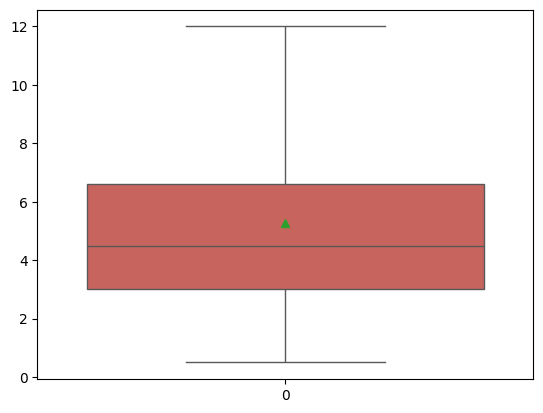

In [33]:
plot_n_boxplots([prep_results_alternate[:, 1]+baseline_results_alternate[:, 1]], [sns.xkcd_rgb["pale red"]])

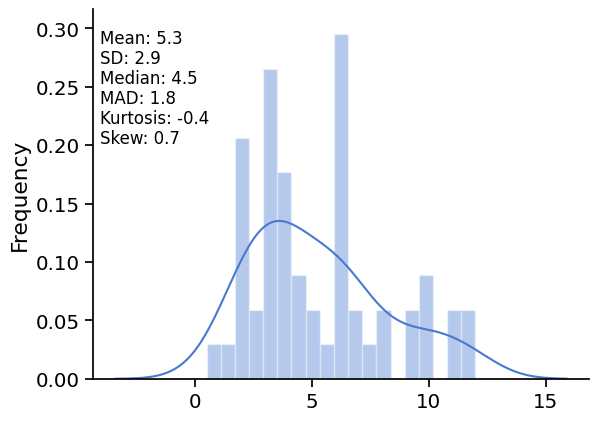

In [34]:
plot_dist_hist(prep_results_alternate[:, 1]+baseline_results_alternate[:, 1], 'PREP Processed Grid Search Data', 'Number of brain components classified by ICLabel', higher=1)
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_brain_prep")

In [35]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\prep", prep_results_alternate[:, 1]+baseline_results_alternate[:, 1])

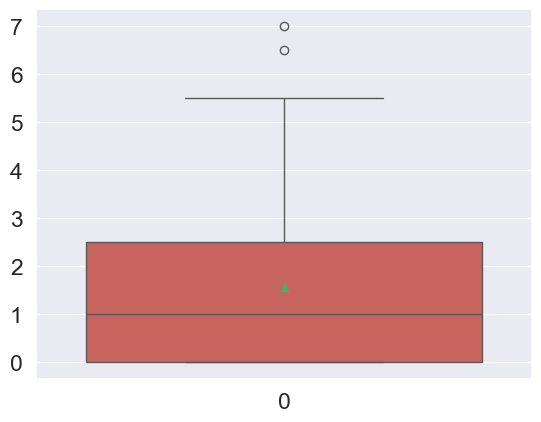

In [36]:
plot_n_boxplots([prep_results_alternate[:, 2]+baseline_results_alternate[:, 2]], [sns.xkcd_rgb["pale red"]])

In [37]:
print(prep_results_alternate[:, 2]+baseline_results_alternate[:, 2])

[3.5 1.5 2.5 2.5 3.5 0.5 1.  1.  2.  5.5 6.5 1.5 0.5 1.5 2.5 2.5 0.  0.
 0.  2.  1.  0.  1.  1.  0.  0.  3.  0.  1.  0.  1.  0.  0.5 0.  0.5 0.
 0.  0.  0.5 0.  3.5 0.  1.5 4.  3.  0.  5.5 0.5 1.  7.  3.5 1.5 2.5 2.
 1.5 0. ]


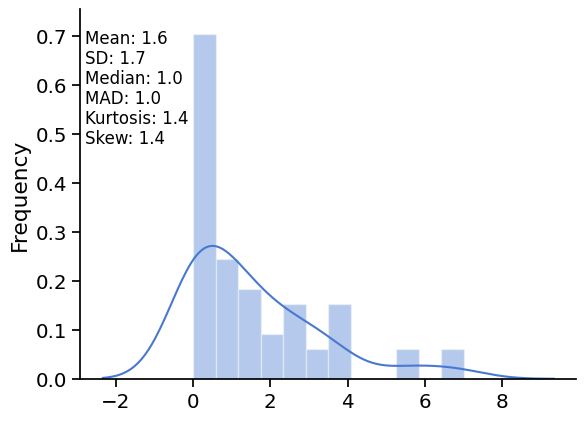

In [35]:
plot_dist_hist(prep_results_alternate[:, 2]+baseline_results_alternate[:, 2], 'PREP Processed Grid Search Data', 'Number of eye and muscle components classified by ICLabel')
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_artefact_prep")

In [76]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\prep", prep_results_alternate[:, 2]+baseline_results_alternate[:, 2])

In [77]:
print(prep_results_alternate[:, 2]+baseline_results_alternate[:, 2])

[3.5 1.5 2.5 2.5 3.5 0.5 1.  1.  2.  5.5 6.5 1.5 0.5 1.5 2.5 2.5 0.  0.
 0.  2.  1.  0.  1.  1.  0.  0.  3.  0.  1.  0.  1.  0.  0.5 0.  0.5 0.
 0.  0.  0.5 0.  3.5 0.  1.5 4.  3.  0.  5.5 0.5 1.  7.  3.5 1.5 2.5 2.
 1.5 0. ]
